# Eigen Images

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

Loads numpy zip.

In [2]:
data = np.load("./data/data_10000.npz")

In [3]:
X = data['arr_0'] # Independent variables
y = data['arr_1'] # Dependent variables

In [4]:
X.shape, y.shape

((5463, 10000), (5463,))

## Eigen Images

In [5]:
X1 = X - X.mean(axis=0)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
X_pca = pca.fit_transform(X1)

In [8]:
X_pca.shape

(5463, 5463)

In [9]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

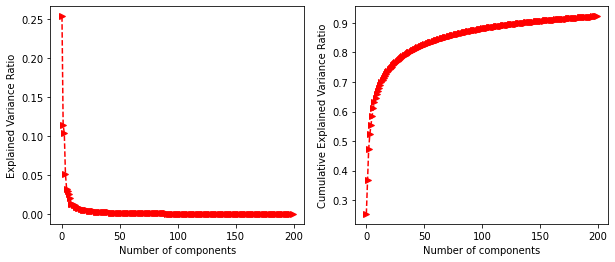

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(eigen_ratio[:200], 'r>--')
plt.xlabel("Number of components")
plt.ylabel("Explained Variance Ratio")

plt.subplot(1, 2, 2)
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.plot(eigen_ratio_cum[:200], 'r>--')

plt.show()

In [16]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
X_pca_50 = pca_50.fit_transform(X1)

In [17]:
X_pca_50.shape

(5463, 50)

Saves PCA components.

In [18]:
import pickle
pickle.dump(pca_50, open("./model/pca_50.pickle", "wb"))

Considers 50 components and inverse transform

In [20]:
X_pca_inv = pca_50.inverse_transform(X_pca_50)
X_pca_inv.shape

(5463, 10000)

Considers one row.

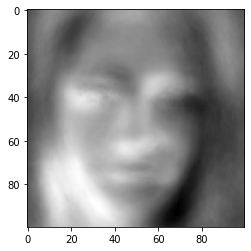

In [25]:
eigen_image = X_pca_inv[0, :]
eigen_image = eigen_image.reshape((100,100))
eigen_image.shape

plt.imshow(eigen_image, cmap= "gray")

Prints original images in comparison to eigen images.

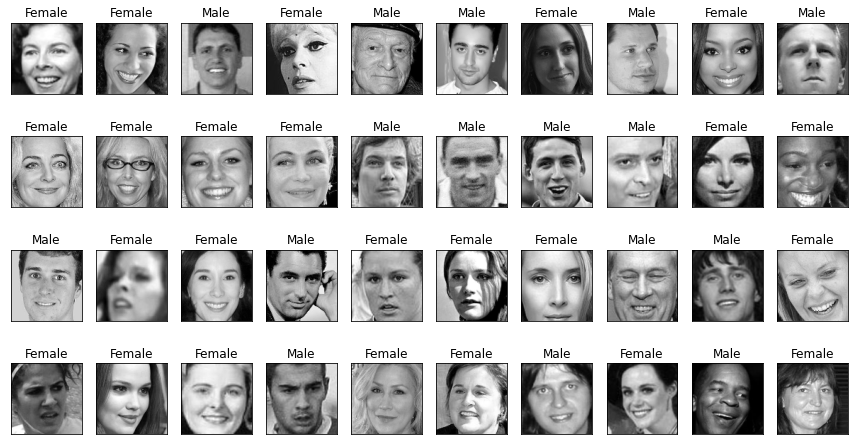

====================Eigen Images====================


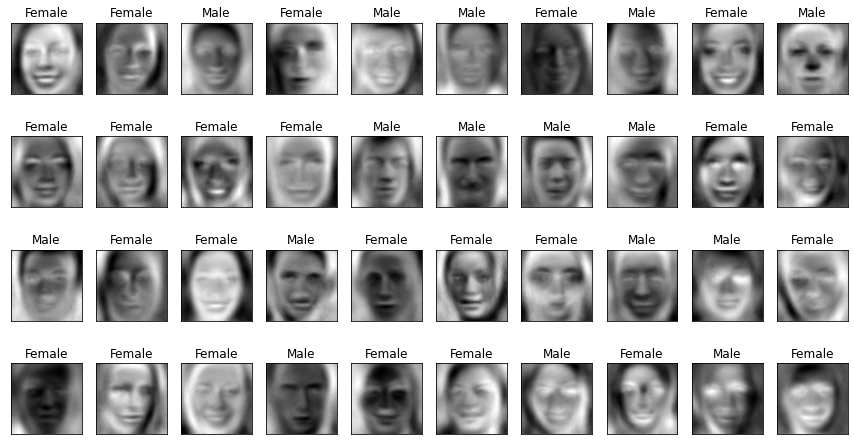

In [27]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

Conclusion: using elbow method, the considered number of componentes is betwenen 25 and 30, which return an explained variance of around 75%. In order to get at least 80% of explained variance, should be considered 50 components.

In [28]:
np.savez("./data/data_pca_50_y_mean.pickle", X_pca_50, y, X.mean(axis = 0))